In [1]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# import data
root = 'C:/Users/Bowen/Desktop/IAQF/Data/'
df = pd.read_csv(root + 'all_data.csv', index_col='date', parse_dates=True)
df


,SPY,RUT,DJIA,STI,NI225,IXIC,HSI,NSEI,SX5E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
date,,,,,,,,,,,,,,,,,,
2013-02-07,125.377808,908.099976,13944.04980,2471.769321,86.662116,3165.129883,23177.00000,5938.799805,2597.919922,1102.62,2746.50,8893.75,679.68,898.64,838.20,509.19,349.74,1509.39
2013-02-08,126.075417,913.669983,13992.96973,2473.654957,84.079609,3193.870117,23215.16016,5903.500000,2630.300049,1109.09,2775.56,8935.24,683.04,903.90,843.08,512.24,351.73,1517.93
2013-02-14,126.482330,923.760010,13973.38965,2491.214815,86.203250,3198.659912,23413.25000,5896.950195,2635.350098,1117.12,2771.43,8953.07,684.94,906.61,845.05,517.23,352.77,1521.38
2013-02-15,126.332886,923.150024,13981.75977,2486.597270,86.854490,3192.030029,23444.56055,5887.399902,2615.260010,1115.75,2764.67,8933.22,683.97,905.77,844.24,516.43,352.39,1519.79
2013-02-19,127.279686,932.000000,14035.66992,2493.909174,88.205537,3213.590088,23143.91016,5939.700195,2662.370117,1123.74,2782.86,9004.38,689.26,912.36,850.22,521.94,355.01,1530.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,398.500000,1887.030029,34302.60938,2416.953750,215.223464,11079.160160,21738.66016,17956.599610,4150.799805,2580.91,11541.48,15918.37,1776.57,2317.66,2197.86,1238.88,916.96,3999.09
2023-01-17,397.769989,1884.290039,33910.85156,2415.439520,215.434597,11095.110350,21577.64063,18053.300780,4174.330078,2575.61,11557.19,15883.56,1773.23,2314.02,2194.39,1234.50,915.06,3990.97
2023-01-18,391.489990,1854.359985,33296.96094,2430.648531,220.702852,10957.009770,21678.00000,18165.349610,4174.339844,2543.36,11410.29,15649.13,1744.77,2278.39,2160.68,1215.10,900.98,3928.86


<AxesSubplot:xlabel='date'>

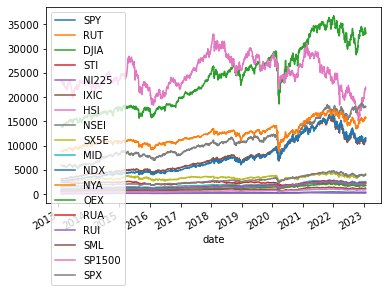

In [41]:
df.plot()

<AxesSubplot:xlabel='date'>

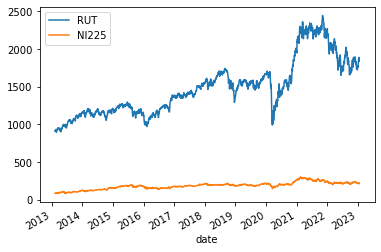

In [42]:
# define pairs
pairs = ['RUT', 'NI225']
target = pairs[0]
feature = pairs[1]
data = df[[target, feature]]
data.plot()

In [43]:
# EDA


# 2. Rolling Linear Regression Residual and Sigma^2 
1. formula for rolling ols: spy = beta * rut + v
2. rolling period: 6mo * 20 trading days/mo = 120days/window
3. rollingOLS reference: https://lost-stats.github.io/Time_Series/Rolling_Regression.html

In [6]:
roll_period = 120

# supress y-intercept using -1

roll_reg = RollingOLS.from_formula(f'{target} ~ {feature} -1', window=roll_period, data=data)
roll_model = roll_reg.fit()


<AxesSubplot:xlabel='date'>

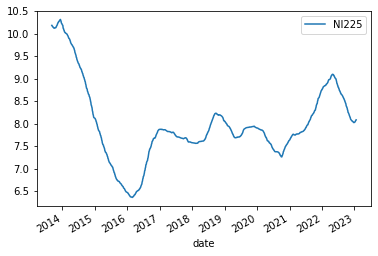

In [44]:
# plot beta vs. time
roll_model.params.plot()


In [45]:
# compute residuals, put into df, remove nan rows
roll_res = pd.DataFrame(data[f'{target}'] - roll_model.params[f'{feature}'] * data[f'{feature}'], columns=['res'])

# roll_model.params
roll_res.dropna(axis=0, inplace=True)
roll_res


,res
date,
2013-09-04,-18.092232
2013-09-05,-17.933484
2013-09-06,3.697038
2013-09-10,-15.437717
2013-09-11,-23.649202
...,...
2023-01-13,151.644700
2023-01-17,145.851372
2023-01-18,72.894471


<AxesSubplot:xlabel='date'>

,res
count,1946.000000
mean,-5.946696
std,90.307926
min,-328.386723
25%,-66.864951
50%,-14.835196
75%,59.672255
max,278.042145


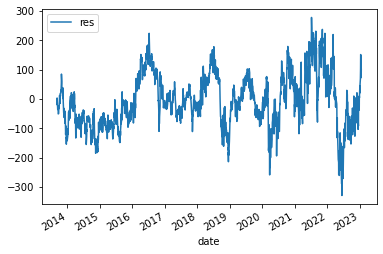

In [46]:
# plot residual
roll_res.plot()
roll_res.describe()

In [10]:
# find residual var_t
def stdt(res):
    """
    take res df, add var_t col
    input: df res
    output: df res with additional col named var
    """
    res['std'] = np.nan
    for i in range(len(res)):
        res.iloc[i-1,1] = np.std(res.iloc[:i, 0], ddof=1)
    res.iloc[-1, 1] = np.std(res.iloc[:,0], ddof=1)
    return res


In [11]:
stdt(roll_res)


,res,std
date,,
2013-09-04,-18.092232,NaN
2013-09-05,-17.933484,0.112252
2013-09-06,3.697038,12.534465
2013-09-10,-15.437717,10.496392
2013-09-11,-23.649202,10.490200
...,...,...
2023-01-13,151.644700,90.264738
2023-01-17,145.851372,90.307368
2023-01-18,72.894471,90.301894


In [12]:
roll_res.describe()

,res,std
count,1946.000000,1945.000000
mean,-5.946696,70.823539
std,90.307926,15.904505
min,-328.386723,0.112252
25%,-66.864951,53.642150
50%,-14.835196,77.273087
75%,59.672255,79.894094
max,278.042145,91.101148


In [13]:
# sse for comparison with kf
roll_res['res2'] = roll_res['res'] ** 2
roll_sse = roll_res['res2'].sum()
roll_sse

15931306.25369744

# 3. Kalman Filter Set up
to simplify reference to parts of the equation, we denote the beta-hat_t|t formula as follows:

b_t = b_t-1 + k_gain * r_t

where b_t is the current beta, b_t-1 is the previous beta, r_t is current residual using current prices and b_t-1, k_gain is current feature / (current feature^2 * gamma^-1), where gamma = state variance / measurement error

 

In [14]:
# run first 120 day model (matching window), to establish baseline for kf model (b_0)
# compute base case

# get first 120 lines
base_df = data.iloc[:roll_period]
base_reg = ols(f'{target} ~ {feature} -1', data=base_df)
base_model = base_reg.fit()
base_model.params

NI225    10.182099
dtype: float64

In [15]:
# keep original df intact
kf = data.copy(deep=True)

In [16]:
# create new columns to contain needed variables
kf['Qt'] = np.nan
kf['Rt'] = np.nan
kf['wt'] = np.nan
kf['vt'] = np.nan
kf['b_tt-1'] = np.nan
kf['r_t'] = np.nan
kf['sv'] = np.nan
kf['me'] = np.nan
kf['gamma'] = np.nan
kf['b_tt'] = np.nan
kf

,RUT,NI225,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-02-07,908.099976,86.662116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-08,913.669983,84.079609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-14,923.760010,86.203250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-15,923.150024,86.854490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-19,932.000000,88.205537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,1887.030029,215.223464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-17,1884.290039,215.434597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-18,1854.359985,220.702852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Qt = sigw: var of  b_t, updated by row; initialized by random.rand

Rt = sigv: var of tgt, updated by row; initialized by rand generation according to 120 day ols var

wt (dist with var = Qt = sigw^2): generated from Qt

vt (dist with var = Rt = sigv^2): generated from Rt

b_tt-1: b_t-1 + wt; b_t-1 initialized by roll_period rows ols (b_0)

r_t = tgt - fea * b_tt-1

sv = P_tt-1: var of all b_tt-1 of prev rows; initialized with a rand sample from N(0, Qt)

me = Rt = sigv: var of spy of prev rows, updated by row

gamma = sv / me

b_tt = b_tt-1 + fea * r_t / (fea^2 + gamma^-1)

In [17]:
# fill in from 121st row
# Qt random initialize
kf.iloc[roll_period, 2] = np.random.rand()
# Rt initialize from var of spy for 1st 120r
kf.iloc[roll_period, 3] = np.var(kf.iloc[:roll_period, 1], ddof=1)
# generate wt
kf.iloc[roll_period, 4] = np.random.normal(0, kf.iloc[roll_period, 2])
# generate vt
kf.iloc[roll_period, 5] = np.random.normal(0, kf.iloc[roll_period, 3])
# compute b_tt-1
kf.iloc[roll_period, 6] = base_model.params[0] + kf.iloc[roll_period, 4]
# compute r_t
kf.iloc[roll_period, 7] = kf.iloc[roll_period, 0] - kf.iloc[roll_period, 1] * kf.iloc[roll_period, 6]
# initialize sv
kf.iloc[roll_period, 8] = np.random.normal(0, kf.iloc[roll_period, 2])
# insert me = Rt
kf.iloc[roll_period, 9] = kf.iloc[roll_period, 3]
# compute gamma
kf.iloc[roll_period, 10] = kf.iloc[roll_period, 8] / kf.iloc[roll_period, 9]
# compute b_tt
kf.iloc[roll_period, 11] = (kf.iloc[roll_period, 6] + kf.iloc[roll_period, 1] * kf.iloc[roll_period, 7] /
                            (kf.iloc[roll_period, 1] ** 2 + kf.iloc[roll_period, 10] ** (-1)))


In [18]:
kf.iloc[120:124]


,RUT,NI225,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-09-05,1028.689941,102.828047,0.120062,34.977886,-0.158664,10.746253,10.023435,-2.000324,-0.078354,34.977886,-0.00224,10.003125
2013-09-06,1029.550049,100.827887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-10,1055.719971,105.333823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-11,1055.339966,106.160364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# fill b_0 into kf[119, b_tt]
kf.iloc[roll_period - 1, 11] = base_model.params[0]
kf.iloc[roll_period - 1, 6] = base_model.params[0]
kf.iloc[roll_period - 1]

RUT       1025.579956
NI225      102.500694
Qt                NaN
Rt                NaN
wt                NaN
vt                NaN
b_tt-1      10.182099
r_t               NaN
sv                NaN
me                NaN
gamma             NaN
b_tt        10.182099
Name: 2013-09-04 00:00:00, dtype: float64

In [20]:
# fill in val of all following rows:
for i in range(roll_period + 1, len(kf)):
    # compute Qt 
    kf.iloc[i, 2] = np.var(kf.iloc[roll_period - 1:i, 11], ddof=1)
    # compute Rt
    kf.iloc[i, 3] = np.var(kf.iloc[roll_period - 1:i, 0], ddof=1)
    # generate wt
    kf.iloc[i, 4] = np.random.normal(0, kf.iloc[i, 2])
    # generate vt
    kf.iloc[i, 5] = np.random.normal(0, kf.iloc[i, 3])
    # compute b_tt-1
    kf.iloc[i, 6] = kf.iloc[i - 1, 11] + kf.iloc[i, 4]
    # compute r_t
    kf.iloc[i, 7] = kf.iloc[i, 0] - kf.iloc[i, 1] * kf.iloc[i, 6]
    # compute sv
    kf.iloc[i, 8] = np.var(kf.iloc[119:i, 6], ddof=1)
    # insert me = Rt
    kf.iloc[i, 9] = kf.iloc[i, 3]
    # compute gamma
    kf.iloc[i, 10] = kf.iloc[i, 8] / kf.iloc[i, 9]
    # compute b_tt
    kf.iloc[i, 11] = kf.iloc[i, 6] + kf.iloc[i, 1] * kf.iloc[i, 7] / (kf.iloc[i, 1] ** 2 + kf.iloc[i, 10] ** (-1))


In [21]:
kf[roll_period:roll_period + 15]

,RUT,NI225,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-09-05,1028.689941,102.828047,0.120062,34.977886,-0.158664,10.746253,10.023435,-2.000324,-0.078354,34.977886,-0.002240,10.003125
2013-09-06,1029.550049,100.827887,0.016016,4.836003,0.011792,-2.911002,10.014917,19.767182,0.012587,4.836003,0.002603,10.203826
2013-09-10,1055.719971,105.333823,0.012131,4.362238,-0.018954,-5.304308,10.184872,-17.091551,0.008866,4.362238,0.002032,10.029501
2013-09-11,1055.339966,106.160364,0.010596,195.840106,0.013552,316.632963,10.043054,-10.834255,0.009013,195.840106,0.000046,10.008200
2013-09-12,1048.479980,106.564473,0.009807,230.561376,-0.014014,-310.250702,9.994185,-16.545093,0.007439,230.561376,0.000032,9.952554
2013-09-13,1053.979980,107.329334,0.010785,199.503448,-0.017617,-92.417161,9.934937,-12.330179,0.007471,199.503448,0.000037,9.900315
2013-09-17,1066.390015,107.348259,0.012778,191.980941,-0.010637,128.916617,9.889678,4.750312,0.008979,191.980941,0.000047,9.905175
2013-09-18,1076.969971,108.670665,0.013223,236.033408,-0.004449,-411.558778,9.900726,1.051547,0.011068,236.033408,0.000047,9.904174
2013-09-19,1075.270020,111.023907,0.013142,316.805405,-0.009326,1006.221468,9.894849,-23.294739,0.011641,316.805405,0.000037,9.829443


In [22]:
kf.tail()

,RUT,NI225,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2023-01-13,1887.030029,215.223464,0.808424,125981.552754,-1.694277,189065.760323,7.530486,266.292668,1.964442,125981.552754,0.000016,8.049376
2023-01-17,1884.290039,215.434597,0.808012,125987.432879,-0.761769,196534.340203,7.287607,314.287298,1.963543,125987.432879,0.000016,7.899935
2023-01-18,1854.359985,220.702852,0.807598,125992.192836,-0.760507,190335.525004,7.139428,278.667964,1.962793,125992.192836,0.000016,7.684182
2023-01-19,1836.349976,217.685329,0.807220,125986.016532,0.800036,-127646.189407,8.484218,-10.539884,1.962164,125986.016532,0.000016,8.463658
2023-01-20,1867.339966,218.637541,0.806938,125973.702060,-1.280622,-36457.171957,7.183036,296.858606,1.961275,125973.702060,0.000016,7.762370


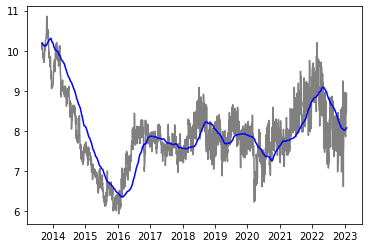

In [47]:
# plot b_tt
plt.plot(kf['b_tt'], c='grey')
plt.plot(roll_model.params, c='b')

kf: grey, roll: blue <br>

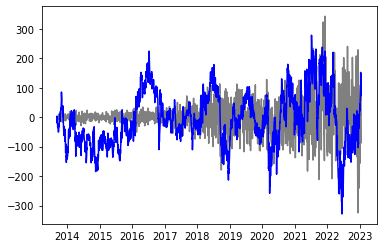

In [48]:
# compute residuals
kf_res = pd.DataFrame(kf[f'{target}'] - kf[f'{feature}'] * kf['b_tt'], columns=['res'])

# plot residuals
plt.plot(kf_res, c='grey')
plt.plot(roll_res.iloc[:,0], c='b')

In [25]:
kf_res.describe()

,res
count,1946.000000
mean,-5.944279
std,58.774876
min,-327.623050
25%,-20.929225
50%,-1.063411
75%,15.783213
max,275.203918


In [26]:
stdt(kf_res)

,res,std
date,,
2013-02-07,NaN,NaN
2013-02-08,NaN,NaN
2013-02-14,NaN,NaN
2013-02-15,NaN,NaN
2013-02-19,NaN,NaN
...,...,...
2023-01-13,154.615482,58.423925
2023-01-17,182.370735,58.565362
2023-01-18,158.439029,58.669124


In [27]:
kf_res['res2'] = kf_res['res'] ** 2
kf_sse = kf_res['res2'].sum()
kf_sse
print(kf_sse < roll_sse)

6787736.13860284

True


# 4. Generate Buy/Sell Signals
1. func to generate b/s singals, using different k
2. generate b/s using kf and rolling beta

In [28]:
# function that generates b/s signal, based on residual and var. 
# k's same as  paper are tested.
def signalBS(residual, k=[0.5, 1, 2, 3]):
    """
    generate new columns in residual df containing buy/sell signals for each day by evaluating buy if res > k*std;
    +1 for buy and -1 for sell
    input: residual: df containing residual of each day and std of all residual up to time t; k: array of constant k as 
    parameter
    output: updated df residual with new columns generated containing b/s decisions
    """
    for n in k:
        residual[f'{n}_std'] = residual['std'] * n
        residual[f'{n}_{target}'] = np.nan
        residual[f'{n}_{feature}'] = np.nan
        for i in range(len(residual)):
            if residual['res'][i] >= residual[f'{n}_std'][i]:
                residual[f'{n}_{target}'][i] = -1
                residual[f'{n}_{feature}'][i] = 1
            elif residual['res'][i] <= - residual[f'{n}_std'][i]:
                residual[f'{n}_{target}'][i] = 1
                residual[f'{n}_{feature}'][i] = -1
            else: 
                residual[f'{n}_{target}'][i] = 0
                residual[f'{n}_{feature}'][i] = 0
                
    return residual.copy(deep=True)
    

In [29]:
# generate rolling ols bs signals, cut off first 2 rows as kf used it as initiation 
roll_bs = signalBS(roll_res)
roll_bs = roll_bs.iloc[2:,:]
roll_bs


,res,std,res2,0.5_std,0.5_RUT,0.5_NI225,1_std,1_RUT,1_NI225,2_std,2_RUT,2_NI225,3_std,3_RUT,3_NI225
date,,,,,,,,,,,,,,,
2013-09-06,3.697038,12.534465,13.668087,6.267233,0.0,0.0,12.534465,0.0,0.0,25.068931,0.0,0.0,37.603396,0.0,0.0
2013-09-10,-15.437717,10.496392,238.323095,5.248196,1.0,-1.0,10.496392,1.0,-1.0,20.992785,0.0,0.0,31.489177,0.0,0.0
2013-09-11,-23.649202,10.490200,559.284775,5.245100,1.0,-1.0,10.490200,1.0,-1.0,20.980399,1.0,-1.0,31.470599,0.0,0.0
2013-09-12,-33.967984,12.353855,1153.823926,6.176928,1.0,-1.0,12.353855,1.0,-1.0,24.707711,1.0,-1.0,37.061566,0.0,0.0
2013-09-13,-35.714237,13.200129,1275.506738,6.600064,1.0,-1.0,13.200129,1.0,-1.0,26.400258,1.0,-1.0,39.600387,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,151.644700,90.264738,22996.114897,45.132369,-1.0,1.0,90.264738,-1.0,1.0,180.529476,0.0,0.0,270.794214,0.0,0.0
2023-01-17,145.851372,90.307368,21272.622746,45.153684,-1.0,1.0,90.307368,-1.0,1.0,180.614735,0.0,0.0,270.922103,0.0,0.0
2023-01-18,72.894471,90.301894,5313.603860,45.150947,-1.0,1.0,90.301894,0.0,0.0,180.603788,0.0,0.0,270.905682,0.0,0.0


In [30]:
roll_bs.describe()

,res,std,res2,0.5_std,0.5_RUT,0.5_NI225,1_std,1_RUT,1_NI225,2_std,2_RUT,2_NI225,3_std,3_RUT,3_NI225
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,-5.934283,70.859913,8194.782569,35.429957,0.090021,-0.090021,70.859913,0.074074,-0.074074,141.719826,0.049383,-0.049383,212.579740,0.014403,-0.014403
std,90.353563,15.827469,11249.195845,7.913734,0.842528,0.842528,15.827469,0.686362,0.686362,31.654938,0.375017,0.375017,47.482407,0.123420,0.123420
min,-328.386723,10.490200,0.021396,5.245100,-1.000000,-1.000000,10.490200,-1.000000,-1.000000,20.980399,-1.000000,-1.000000,31.470599,-1.000000,-1.000000
25%,-66.944371,53.659437,986.240915,26.829718,-1.000000,-1.000000,53.659437,0.000000,-1.000000,107.318873,0.000000,0.000000,160.978310,0.000000,0.000000
50%,-14.751400,77.276182,4022.792977,38.638091,0.000000,0.000000,77.276182,0.000000,0.000000,154.552364,0.000000,0.000000,231.828546,0.000000,0.000000
75%,59.686385,79.899627,10879.839843,39.949813,1.000000,1.000000,79.899627,1.000000,0.000000,159.799253,0.000000,0.000000,239.698880,0.000000,0.000000
max,278.042145,91.101148,107837.840083,45.550574,1.000000,1.000000,91.101148,1.000000,1.000000,182.202296,1.000000,1.000000,273.303444,1.000000,1.000000


In [31]:
# kf bs
kf_bs = signalBS(kf_res)
kf_bs.iloc[121:].describe()

,res,std,res2,0.5_std,0.5_RUT,0.5_NI225,1_std,1_RUT,1_NI225,2_std,2_RUT,2_NI225,3_std,3_RUT,3_NI225
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,-5.941133,23.396107,3491.465433,11.698054,0.031379,-0.031379,23.396107,0.037037,-0.037037,46.792215,0.033951,-0.033951,70.188322,0.028292,-0.028292
std,58.804312,14.275852,8857.681175,7.137926,0.855814,0.855814,14.275852,0.730673,0.730673,28.551704,0.478976,0.478976,42.827555,0.313895,0.313895
min,-327.623050,7.065909,0.000002,3.532955,-1.000000,-1.000000,7.065909,-1.000000,-1.000000,14.131818,-1.000000,-1.000000,21.197727,-1.000000,-1.000000
25%,-21.076016,11.328680,47.803061,5.664340,-1.000000,-1.000000,11.328680,0.000000,-1.000000,22.657360,0.000000,0.000000,33.986041,0.000000,0.000000
50%,-1.063411,17.246463,349.649635,8.623232,0.000000,0.000000,17.246463,0.000000,0.000000,34.492926,0.000000,0.000000,51.739389,0.000000,0.000000
75%,15.785587,32.940498,2132.646050,16.470249,1.000000,1.000000,32.940498,1.000000,0.000000,65.880996,0.000000,0.000000,98.821494,0.000000,0.000000
max,275.203918,58.774876,107336.863047,29.387438,1.000000,1.000000,58.774876,1.000000,1.000000,117.549751,1.000000,1.000000,176.324627,1.000000,1.000000


In [32]:
kf_bs.iloc[121:]

,res,std,res2,0.5_std,0.5_RUT,0.5_NI225,1_std,1_RUT,1_NI225,2_std,2_RUT,2_NI225,3_std,3_RUT,3_NI225
date,,,,,,,,,,,,,,,
2013-09-06,0.719838,10.683478,0.518167,5.341739,0.0,0.0,10.683478,0.0,0.0,21.366956,0.0,0.0,32.050433,0.0,0.0
2013-09-10,-0.725736,9.079131,0.526693,4.539566,0.0,0.0,9.079131,0.0,0.0,18.158263,0.0,0.0,27.237394,0.0,0.0
2013-09-11,-7.134143,7.950352,50.896000,3.975176,1.0,-1.0,7.950352,0.0,0.0,15.900703,0.0,0.0,23.851055,0.0,0.0
2013-09-12,-12.108682,7.675972,146.620190,3.837986,1.0,-1.0,7.675972,1.0,-1.0,15.351944,0.0,0.0,23.027916,0.0,0.0
2013-09-13,-8.614270,7.065909,74.205648,3.532955,1.0,-1.0,7.065909,1.0,-1.0,14.131818,0.0,0.0,21.197727,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,154.615482,58.423925,23905.947303,29.211962,-1.0,1.0,58.423925,-1.0,1.0,116.847850,-1.0,1.0,175.271775,0.0,0.0
2023-01-17,182.370735,58.565362,33259.084935,29.282681,-1.0,1.0,58.565362,-1.0,1.0,117.130723,-1.0,1.0,175.696085,-1.0,1.0
2023-01-18,158.439029,58.669124,25102.926007,29.334562,-1.0,1.0,58.669124,-1.0,1.0,117.338248,-1.0,1.0,176.007372,0.0,0.0


# 5. Backtest Returns
1. find historical returns
2. adjust all df (return, kf b/s, rolling b/s) of various k's to same # of rows
3. split each b/s into 3 df contianing data of single k's, contain them in matrix. (2-3 are weird, i do this just bc idk how to better organize the data structure early on. if it works, it works yea?)
4. compute back test return results
5. plot backtest results

In [33]:
# find daily returns from df
data[f'{target}_ret'] = data[f'{target}'].pct_change(1)
data[f'{feature}_ret'] = data[f'{feature}'].pct_change(1)
df

,SPY,RUT,DJIA,STI,NI225,IXIC,HSI,NSEI,SX5E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
date,,,,,,,,,,,,,,,,,,
2013-02-07,125.377808,908.099976,13944.04980,2471.769321,86.662116,3165.129883,23177.00000,5938.799805,2597.919922,1102.62,2746.50,8893.75,679.68,898.64,838.20,509.19,349.74,1509.39
2013-02-08,126.075417,913.669983,13992.96973,2473.654957,84.079609,3193.870117,23215.16016,5903.500000,2630.300049,1109.09,2775.56,8935.24,683.04,903.90,843.08,512.24,351.73,1517.93
2013-02-14,126.482330,923.760010,13973.38965,2491.214815,86.203250,3198.659912,23413.25000,5896.950195,2635.350098,1117.12,2771.43,8953.07,684.94,906.61,845.05,517.23,352.77,1521.38
2013-02-15,126.332886,923.150024,13981.75977,2486.597270,86.854490,3192.030029,23444.56055,5887.399902,2615.260010,1115.75,2764.67,8933.22,683.97,905.77,844.24,516.43,352.39,1519.79
2013-02-19,127.279686,932.000000,14035.66992,2493.909174,88.205537,3213.590088,23143.91016,5939.700195,2662.370117,1123.74,2782.86,9004.38,689.26,912.36,850.22,521.94,355.01,1530.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,398.500000,1887.030029,34302.60938,2416.953750,215.223464,11079.160160,21738.66016,17956.599610,4150.799805,2580.91,11541.48,15918.37,1776.57,2317.66,2197.86,1238.88,916.96,3999.09
2023-01-17,397.769989,1884.290039,33910.85156,2415.439520,215.434597,11095.110350,21577.64063,18053.300780,4174.330078,2575.61,11557.19,15883.56,1773.23,2314.02,2194.39,1234.50,915.06,3990.97
2023-01-18,391.489990,1854.359985,33296.96094,2430.648531,220.702852,10957.009770,21678.00000,18165.349610,4174.339844,2543.36,11410.29,15649.13,1744.77,2278.39,2160.68,1215.10,900.98,3928.86


In [34]:
# cut index df, KF bs df, rolling bs df, to the same size by matching indices
data = data[data.index.isin(roll_bs.index)]
kf_bs = kf_bs[kf_bs.index.isin(roll_bs.index)]


In [35]:
# reorganize b/s signals into arrays containing dfs for easier manipulation
def splitBS(bs):
    """
    split current b/s signal df into an array containing 3 dfs, each containing b/s for a single k
    input: bs: 1 big df containing random stuff and b/s signals
    output: res: array with 3 dfs each with b/s signal for a single k
    """
    k05 = bs[[f'0.5_{target}', f'0.5_{feature}']].rename(columns={f'0.5_{target}': f'{target}', f'0.5_{feature}': f'{feature}'})
    k1 = bs[[f'1_{target}', f'1_{feature}']].rename(columns={f'1_{target}': f'{target}', f'1_{feature}': f'{feature}'})
    k2 = bs[[f'2_{target}', f'2_{feature}']].rename(columns={f'2_{target}': f'{target}', f'2_{feature}': f'{feature}'})
    k3 = bs[[f'3_{target}', f'3_{feature}']].rename(columns={f'3_{target}': f'{target}', f'3_{feature}': f'{feature}'})
    res = [k05, k1, k2, k3]
    return res


In [36]:
# split the bs dataframes
rolls = splitBS(roll_bs)
kfs = splitBS(kf_bs)
kfs

[            RUT  NI225
 date                  
 2013-09-06  0.0    0.0
 2013-09-10  0.0    0.0
 2013-09-11  1.0   -1.0
 2013-09-12  1.0   -1.0
 2013-09-13  1.0   -1.0
 ...         ...    ...
 2023-01-13 -1.0    1.0
 2023-01-17 -1.0    1.0
 2023-01-18 -1.0    1.0
 2023-01-19  0.0    0.0
 2023-01-20 -1.0    1.0
 
 [1944 rows x 2 columns],
             RUT  NI225
 date                  
 2013-09-06  0.0    0.0
 2013-09-10  0.0    0.0
 2013-09-11  0.0    0.0
 2013-09-12  1.0   -1.0
 2013-09-13  1.0   -1.0
 ...         ...    ...
 2023-01-13 -1.0    1.0
 2023-01-17 -1.0    1.0
 2023-01-18 -1.0    1.0
 2023-01-19  0.0    0.0
 2023-01-20 -1.0    1.0
 
 [1944 rows x 2 columns],
             RUT  NI225
 date                  
 2013-09-06  0.0    0.0
 2013-09-10  0.0    0.0
 2013-09-11  0.0    0.0
 2013-09-12  0.0    0.0
 2013-09-13  0.0    0.0
 ...         ...    ...
 2023-01-13 -1.0    1.0
 2023-01-17 -1.0    1.0
 2023-01-18 -1.0    1.0
 2023-01-19  0.0    0.0
 2023-01-20 -1.0    1.0
 
 [1944

In [37]:
# function for backtest returns
def backtest(arr, ret, k=[0.5, 1, 2, 3]):
    """
    applying b/s on daily ret, find daily total ret, then cumprod to find cumret
    input: arr: array containing 3 df, each containing b/s resulting from a k; ret: 1df containing daily ret
    ouput: res: 1 df containing cumret
    """
    res = pd.DataFrame()
    # multiply daily ret inplace of b/s, find sum of two ret for daily ret, then cumprod
    for i, d in enumerate(arr):
        d[f'{target}_ret'] = d[f'{target}'].shift(1) * ret[f'{target}_ret']
        d[f'{feature}_ret'] = d[f'{feature}'].shift(1) * ret[f'{feature}_ret']
        d['dret'] = d[f'{target}_ret'] + d[f'{feature}_ret']
        d.dropna(inplace=True)
        d['cumpl'] = np.cumprod(1 + d['dret'].values)
        n = k[i]
        res[f'{n}'] = d['cumpl']
    return res


In [38]:
roll_backtest = backtest(rolls, data)
kf_backtest = backtest(kfs, data)


<AxesSubplot:xlabel='date'>

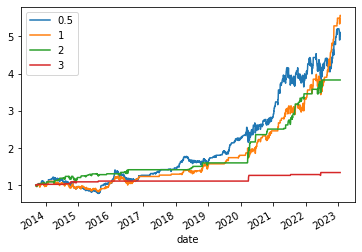

In [49]:
roll_backtest.plot()

<AxesSubplot:xlabel='date'>

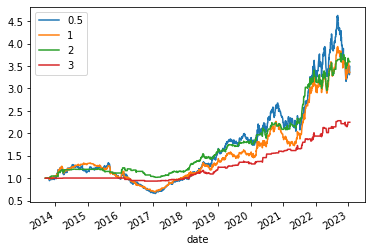

In [50]:
kf_backtest.plot()